### petrol_consumption (витрати палива)

https://drive.google.com/file/d/1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_/view

#### Зробити модель, що прогнозує витрати палива 
Розшифровка до даних:
 - Petrol_tax: the buying price of the car) - покупная цена автомобиля
 - Average_income: the maintenance cost - расходы на содержание автомобиля
 - Paved_Highways: number of doors - колличество дверей авто
 - Population_Driver_licence(%): the seating capacity - кол-во место в авто (но % ??)
 - Petrol_Consumption: the luggage capacity - расход бензина

In [3]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # библиотека для построения графиков
import seaborn as sns           # библиотека для построения графиков
%matplotlib inline              # для вывода графиков в блокноте

In [10]:
petrol_consum = pd.read_csv('petrol_consumption.csv') # загрузили файл с данными

petrol_consum.head()  # выводим 5 первых строк для ознакомления

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [11]:
petrol_consum.info()   # выводим инфо датафрейма для ознакомления

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [12]:
petrol_consum.describe()  # выводим стат инфо для ознакомления

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


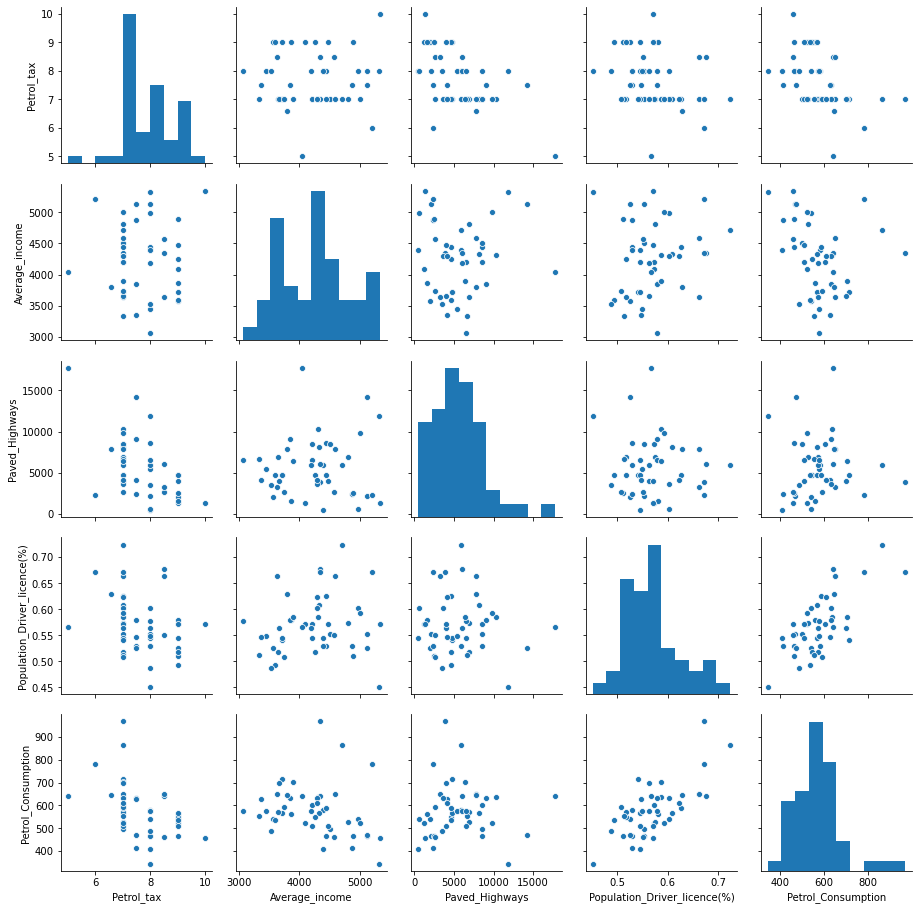

In [13]:
sns.pairplot(petrol_consum) # передали весь датафрейм - все варианты комбинаций колонок

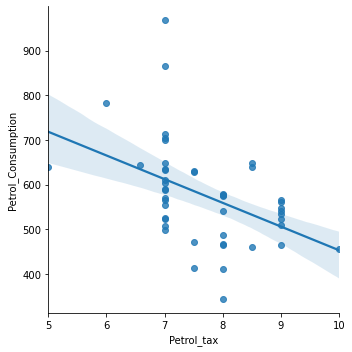

In [14]:
sns.lmplot(x='Petrol_tax',y='Petrol_Consumption',data=petrol_consum)  #  y - то что прогнозируем

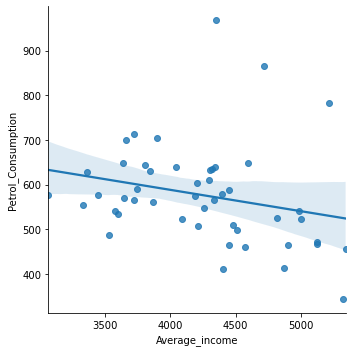

In [15]:
sns.lmplot(x='Average_income',y='Petrol_Consumption',data=petrol_consum)  #  y - то что прогнозируем

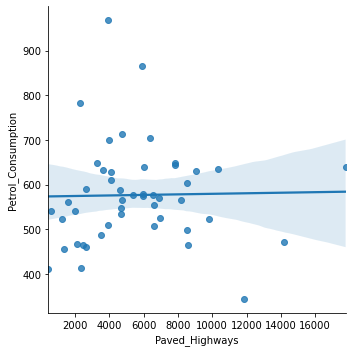

In [17]:
sns.lmplot(x='Paved_Highways',y='Petrol_Consumption',data=petrol_consum)  #  y - то что прогнозируем

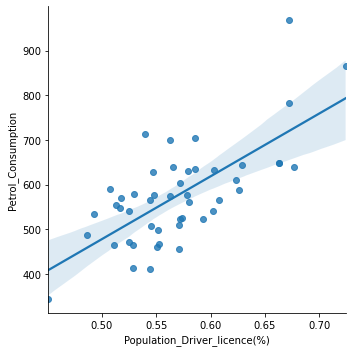

In [18]:
sns.lmplot(x='Population_Driver_licence(%)',y='Petrol_Consumption',data=petrol_consum)  #  y - то что прогнозируем

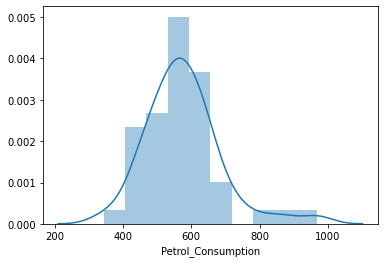

In [20]:
sns.distplot(petrol_consum['Petrol_Consumption']) # показывает ???

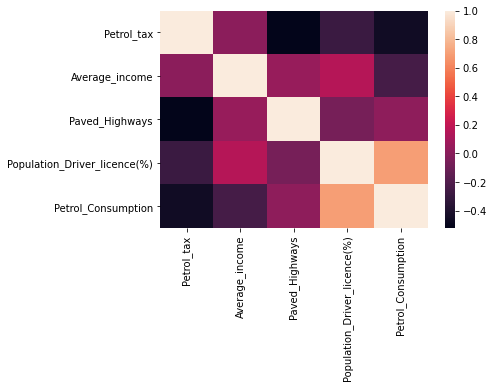

In [22]:
sns.heatmap(petrol_consum.corr()) # показывает корреляцию (лучшая корр-я расхода топлива и кол-ва мест в авто, хуже с расходами на авто)

In [23]:
X = petrol_consum[['Petrol_tax', 'Average_income', 'Paved_Highways',
               'Population_Driver_licence(%)']]

y = petrol_consum['Petrol_Consumption']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
lm.score(X_train, y_train)

0.619857498668024

In [30]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient']) # коэффиц влияния каждой из колонок на результат
coeff_df

,Coefficient
Petrol_tax,-24.196784
Average_income,-0.081680
Paved_Highways,-0.000522
Population_Driver_licence(%),1324.675464


In [31]:
np.array(y_test)  # смотрим результаты y_test

array([640, 464, 649, 648, 865, 524, 782, 540, 603, 510], dtype=int64)

In [38]:
predictions = lm.predict(X_test)

lm.score(X_test, y_test)

0.7432377462585582

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 45.89798425408222
MSE: 3609.3711914068817
RMSE: 60.07804250645057
